In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('energydata_complete.csv')

In [3]:
df['date'] = pd.to_datetime(df['date'])
df['Only_Date'] = df['date'].dt.date

In [4]:
df.groupby(['Only_Date']).mean()['Appliances'].to_csv('Arima_data.csv')

Date
2016-01-12     85.694444
2016-01-13     97.013889
2016-01-14    151.388889
2016-01-15    125.347222
2016-01-16    125.277778
Name: Consumption, dtype: float64


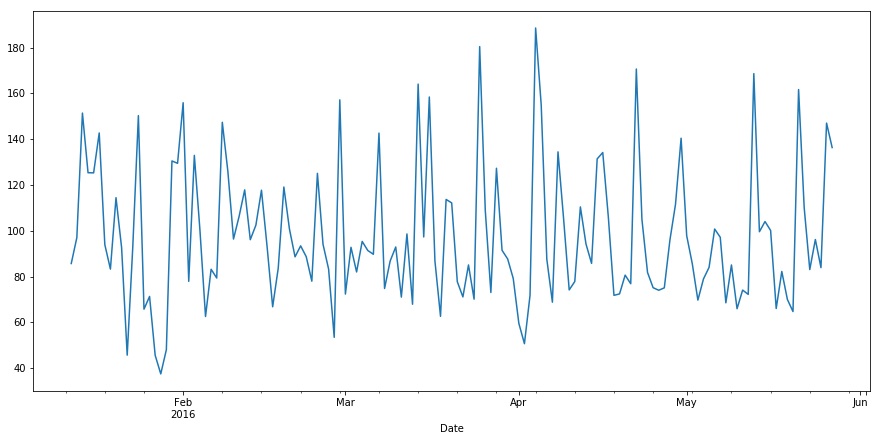

In [5]:
#series = df.groupby(['Only_Date']).mean()['Total Wh']
series = pd.read_csv('Arima_data.csv',names = ['Date','Consumption'], header=0, parse_dates=[0], index_col=0, squeeze=True)
print(series.head())
plt.figure(figsize=(15,7))
series.plot()
plt.show()

In [6]:
series = series.astype('float64')

In [7]:
pd.Series.autocorr(series,lag=7)

0.112779139788947

In [8]:
##### autocorrelation_plot(series)
plt.figure(figsize=(15,7))
plt.show()

In [9]:
# fit model
model = ARIMA(series, order=(3,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                             ARIMA Model Results                              
Dep. Variable:          D.Consumption   No. Observations:                  136
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -676.156
Method:                       css-mle   S.D. of innovations             34.848
Date:                Fri, 16 Mar 2018   AIC                           1362.311
Time:                        16:04:56   BIC                           1376.875
Sample:                    01-13-2016   HQIC                          1368.229
                         - 05-27-2016                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1521      1.383      0.110      0.913      -2.559       2.863
ar.L1.D.Consumption    -0.5460      0.083     -6.544      0.000      -0.709      -0.382
ar.L2.D.Consumpt

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


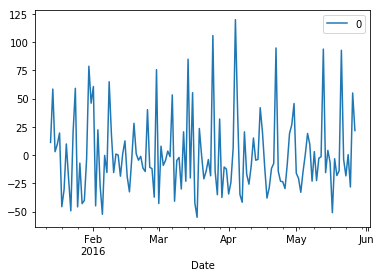

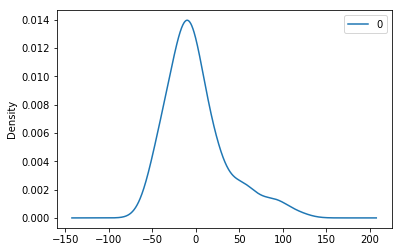

                0
count  136.000000
mean     0.252822
std     35.026710
min    -55.093826
25%    -21.414879
50%     -4.749697
75%     15.958265
max    119.819063


In [10]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [11]:
#Rolling Forecast ARIMA Model
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


predicted=99.674749, expected=77.847222
predicted=92.074163, expected=110.416667
predicted=95.506862, expected=94.236111
predicted=96.741276, expected=85.763889
predicted=90.068890, expected=131.388889
predicted=104.648048, expected=134.166667
predicted=108.159255, expected=105.902778
predicted=107.908689, expected=71.805556
predicted=99.337143, expected=72.430556
predicted=94.325858, expected=80.625000
predicted=95.273191, expected=76.875000
predicted=86.155375, expected=170.625000
predicted=116.024874, expected=105.000000
predicted=92.883092, expected=81.805556
predicted=91.009699, expected=75.138889
predicted=97.843019, expected=74.027778
predicted=87.029535, expected=75.069444
predicted=97.996746, expected=95.902778
predicted=88.540638, expected=111.527778
predicted=90.436701, expected=140.416667
predicted=104.287375, expected=97.847222
predicted=95.227067, expected=85.625000
predicted=94.720478, expected=69.722222
predicted=93.421651, expected=78.958333
predicted=92.375608, expect

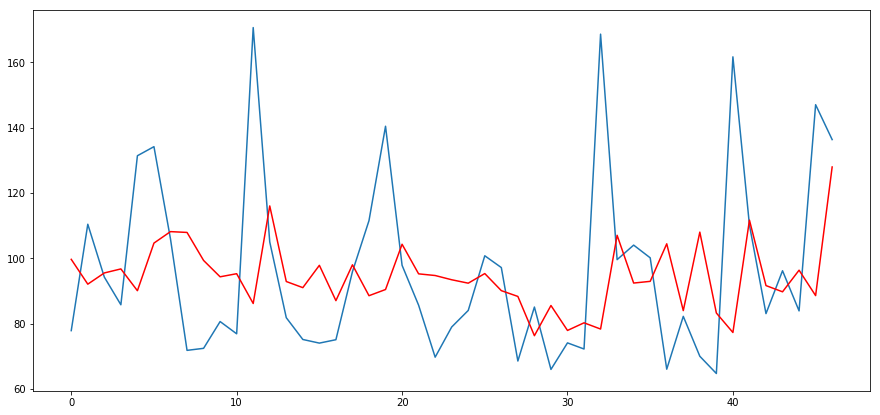

In [12]:
plt.figure(figsize=(15,7))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()